## Importing necessary libraries and data

In [1]:
#by Narges Shahmohammadi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

df = pd.read_csv("used_phone_data.csv")


## Data Overview

- Observations
- Sanity checks

In [2]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       86.96  
1        325     249.39      161.49  
2        162     359.47      268.55  
3        345     278.93      180.23  
4        293     140.87      103.80

In [3]:
df.shape

(3571, 15)

#### there are 3571 rows and 15 columns in our data

In [4]:
#check the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


#### <font color='brown'> There are some missing data in the database, so let's ckeck them out
#### 4 columns need to change their type: brand_name/os /4g/5g 
#### we also have `release_year` which is date column but for now I don't think that it needs any change 

In [5]:
df.isnull().sum().sort_values(ascending= False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

#### it seems we have null in some columns ! main_camera_mp has the highest amount of null = 180


In [6]:

pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)  
df.describe(include="all").T

count unique      top  freq     mean      std      min  \
brand_name           3571     34   Others   509      NaN      NaN      NaN   
os                   3571      4  Android  3246      NaN      NaN      NaN   
screen_size      3571.000    NaN      NaN   NaN   14.804    5.153    2.700   
4g                   3571      2      yes  2359      NaN      NaN      NaN   
5g                   3571      2       no  3419      NaN      NaN      NaN   
main_camera_mp   3391.000    NaN      NaN   NaN    9.400    4.818    0.080   
selfie_camera_mp 3569.000    NaN      NaN   NaN    6.547    6.879    0.300   
int_memory       3561.000    NaN      NaN   NaN   54.533   84.696    0.005   
ram              3561.000    NaN      NaN   NaN    4.057    1.392    0.030   
battery          3565.000    NaN      NaN   NaN 3067.226 1364.207   80.000   
weight           3564.000    NaN      NaN   NaN  179.424   90.281   23.000   
release_year     3571.000    NaN      NaN   NaN 2015.965    2.292 2013.000   
days_used        3571.000    NaN      NaN   NaN  675.391  248.641   91.000   
new_price        3571.000    NaN      NaN   NaN  237.389  197.546    9.130   
used_price       3571.000    NaN      NaN   NaN  109.880  121.501    2.510   

                      25%      50%      75%       max  
brand_name            NaN      NaN      NaN       NaN  
os                    NaN      NaN      NaN       NaN  
screen_size        12.700   13.490   16.510    46.360  
4g                    NaN      NaN      NaN       NaN  
5g                    NaN      NaN      NaN       NaN  
main_camera_mp      5.000    8.000   13.000    48.000  
selfie_camera_mp    2.000    5.000    8.000    32.000  
int_memory         16.000   32.000   64.000  1024.000  
ram                 4.000    4.000    4.000    16.000  
battery          2100.000 3000.000 4000.000 12000.000  
weight            140.000  159.000  184.000   950.000  
release_year     2014.000 2016.000 2018.000  2020.000  
days_used         536.000  690.000  872.000  1094.000  
new_price         120.130  189.800  291.935  2560.200  
used_price         45.205   75.530  126.000  1916.540

* os column has 4unique values 
* 4g and 5g have 2 unique values 
* brand_name has 34 unique values 
* release_year rang from 2015 to 2020
* The average of used_price is 109.880 euro

In [7]:
df['os'].value_counts()

Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64

Android in the data has the most amount

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

## Univariate Data Analysis

#### since we will take a look to `used_price` later, now we start with `new_price`

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


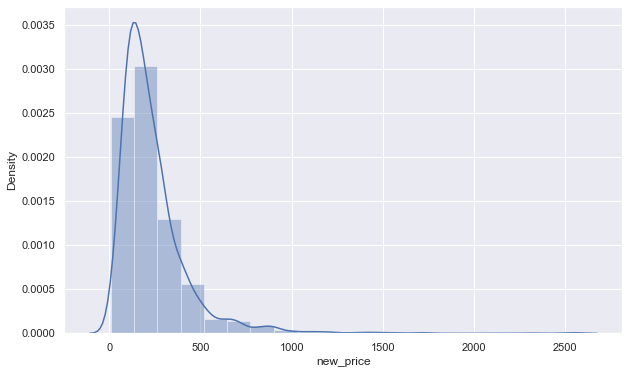

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df.new_price,color="b",bins=20);

##### distribution of new_price is highly skewed to the right. As I showed in above table its mean is 237.38

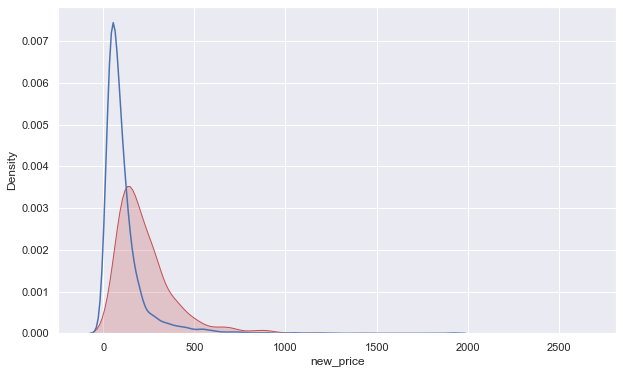

In [9]:
plt.figure(figsize=(10,6))
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['new_price'], shade=True, color="r")
fig = sns.kdeplot(df['used_price'], shade=False, color="b")

plt.show();

#### showing differnce between new price and used price. both have a highly right skewed distribution.
#### the red one is for new price and as I expected it is higher than the used one.
#### the mean of used_price is 109.88 € which is much lower than the new_price(237.38€) 

In [10]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) 
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="y")  
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2) 
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--")  
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-") 
    

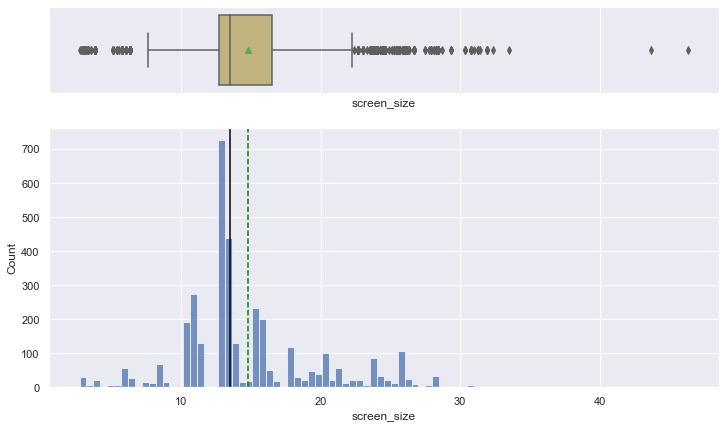

In [11]:
histogram_boxplot(df, "screen_size")

#### distribution of screen_size skewed to the right and its mean is 14.80 cm. we can see outlieres in its boxplot

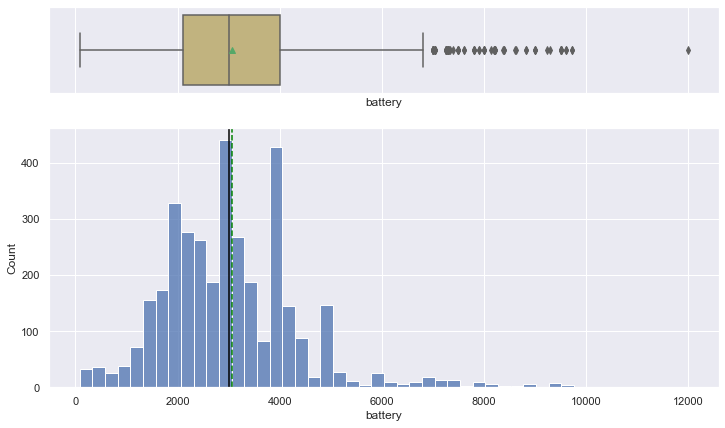

In [12]:
histogram_boxplot(df, "battery")

#### distribution of battery is `not` look like a normal distriboution! also seems that it has outliers and its mean is 3067.22

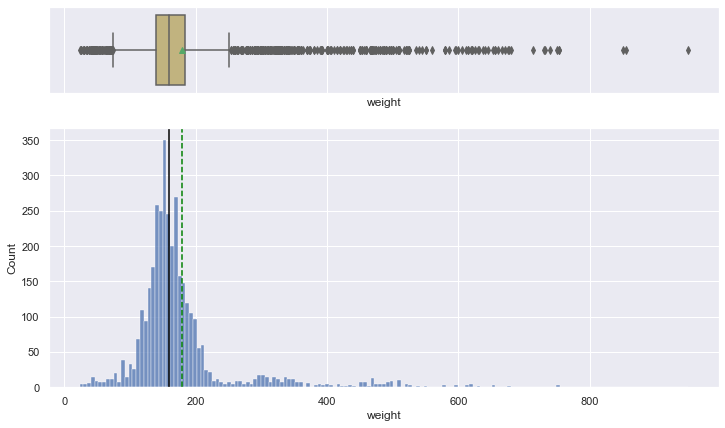

In [13]:
histogram_boxplot(df, "weight")

#### column weight distribution is very skewed to the right which means some cell phones are very heavy.
#### the mean of cell phons's weight is around 179 grams

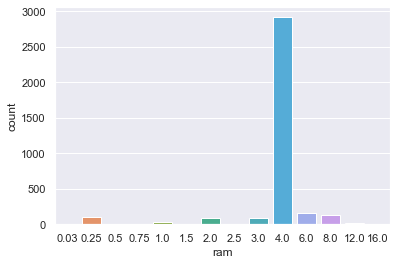

In [14]:
sns.countplot(data = df, x='ram')
plt.show()

#### take a look at column ram by  bar plot. ram of 4.0 GB is higher than others ( its count is around 2900).

#### it is good to see each percentages of amount of RAM

<AxesSubplot:>

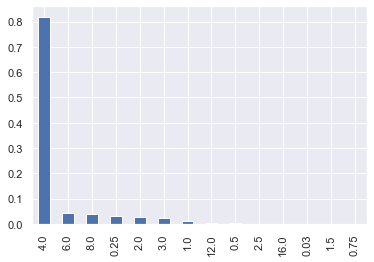

In [15]:
(df['ram'].value_counts() / df['ram'].count()).plot(kind='bar')

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


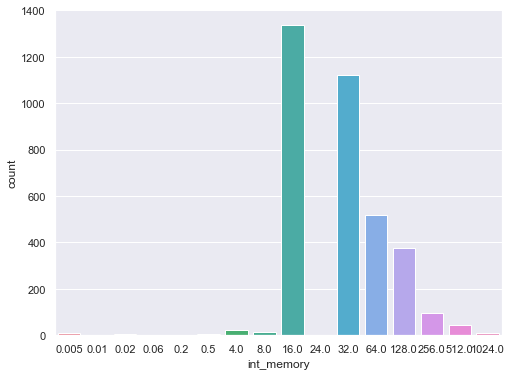

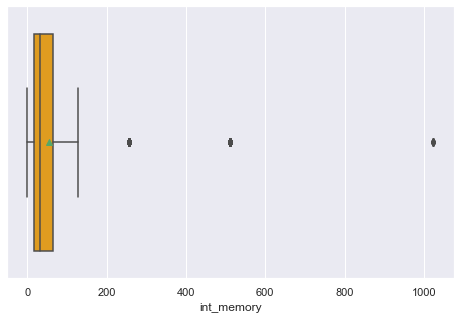

In [16]:
#count plot and box plot for internal memory of cell phons.
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='int_memory')

plt.figure(figsize=(8,5))
sns.boxplot(df['int_memory'], color='orange', showmeans=True);

#### most of cell phons have 16.0 GB internal memory and then it is 32.0 GB. we have some outliers which I think is better to get rid of them.

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


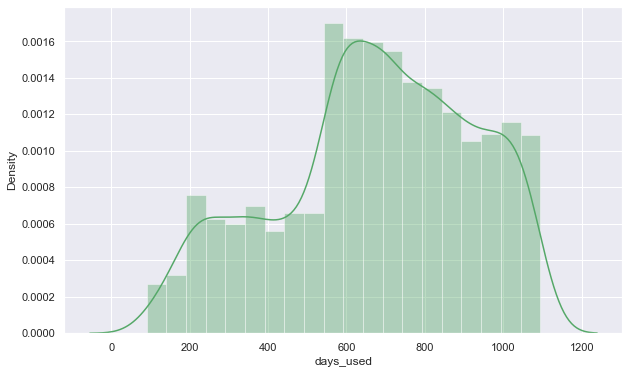

In [17]:
#distribution of [days_used].with mean of 675.391 
plt.figure(figsize=(10,6))
sns.distplot(df.days_used
             ,color="g",bins=20);

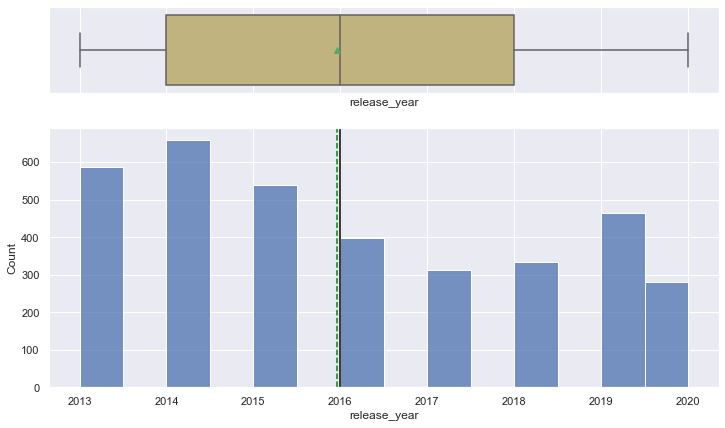

In [18]:
histogram_boxplot(df, "release_year")

#### The `release_year` variable is not a normal distribution, mean and the median is 2016.

## Multivariate Data Analysis

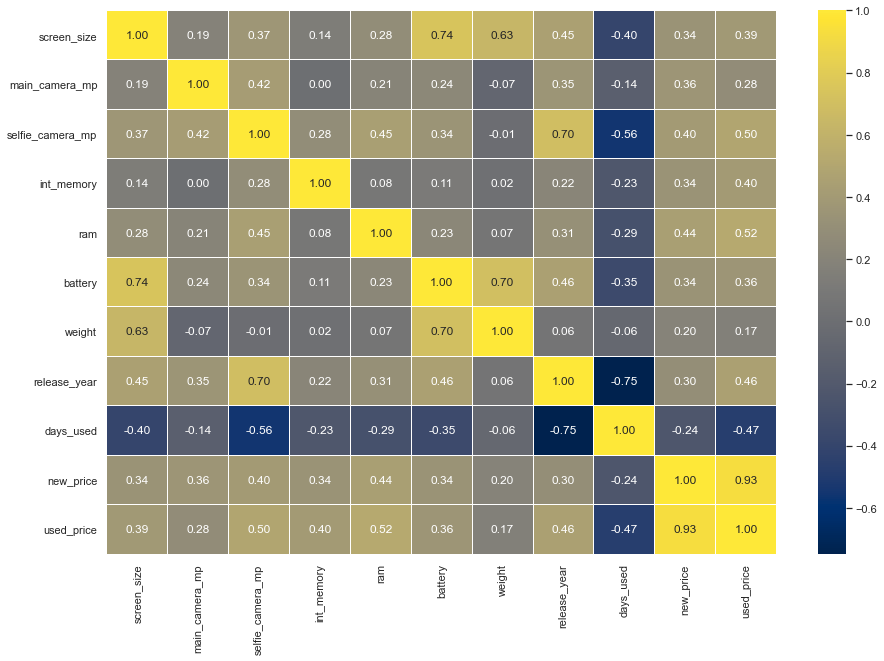

In [19]:
fig,ax = plt.subplots(figsize=(15,10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()

#### it seems that `new_price` and `used_price` are highly positive correlated(0.93) which I will show you in blow plot.
#### also between `used_price` and `days_used` are nagative relationship(-0.47)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


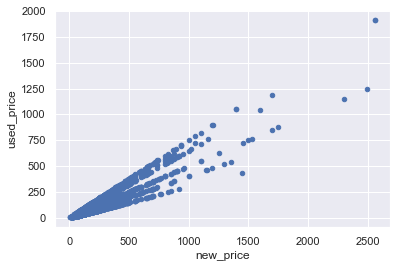

In [20]:
df.plot.scatter(x='new_price', y='used_price');

<Figure size 1080x648 with 0 Axes>

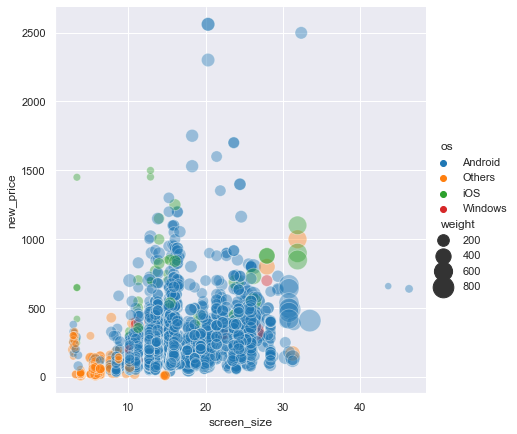

In [21]:
plt.figure(figsize=(15,9))
sns.relplot(data = df, x='screen_size', y='new_price', hue='os',size='weight',sizes= (50,500), 
            alpha= 0.4, palette='tab10',height= 6 );

####  By this plot we can see that most of  the price of new phones are below 1000 euros and size of screen does not effect the price.
####  Also, bigest screen size are heavier. as I will mention later, Android is more popular 

<Figure size 1080x648 with 0 Axes>

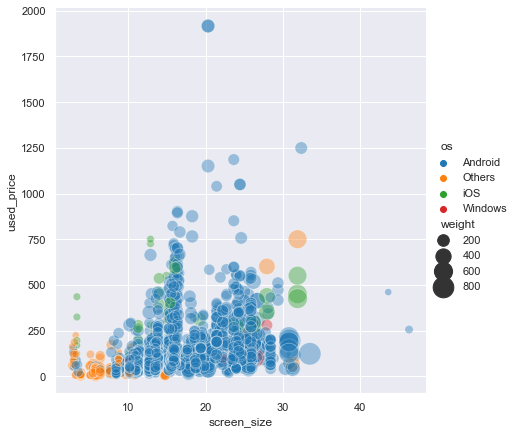

In [22]:
plt.figure(figsize=(15,9))
sns.relplot(data = df, x='screen_size', y='used_price', hue='os',size='weight',sizes= (50,500), 
            alpha= 0.4, palette='tab10',height= 6 );

 #### the same plot but for `price of the used/refurbished` phone. most of them are below 500 euros and also bigger screen or heavier cell phone does not effect the price.


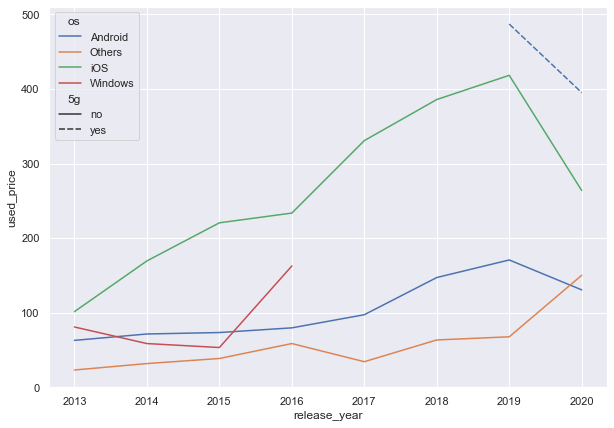

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="release_year", y="used_price", hue="os",style="5g", ci=None);

* Price for used IOS and then Android was growing up until 2019 after this year we can see  (Other categories) is growing slightly. 
* Windows production has been stopped in 2016 althogh, its price was growing up with a sharp slope! 
* It is just Android which has 5G available since 2019

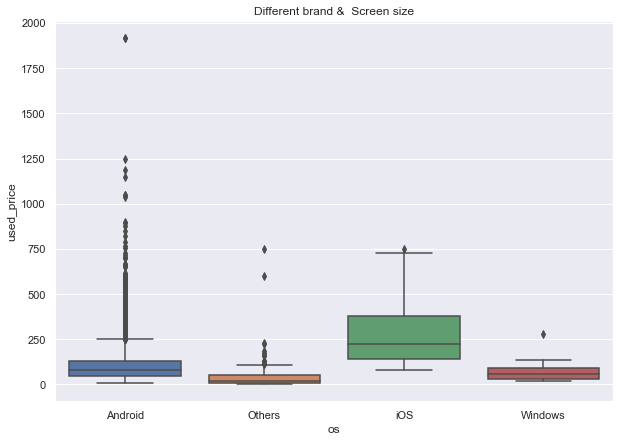

In [24]:
plt.figure(figsize=(10,7))

ax = sns.boxplot(x="os", y="used_price",data=df)
plt.title("Different brand &  Screen size");

* Between differnt os, ios has the higher price and then it is Andriod.
* We can see lots of outliers especially in android category.

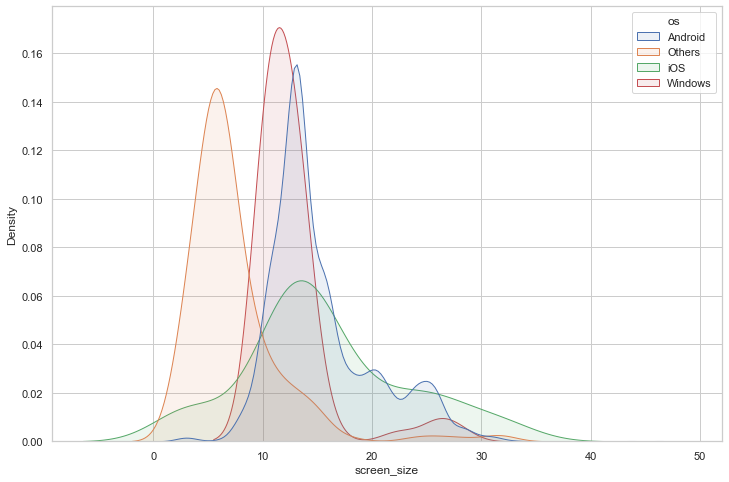

In [25]:
# look at the screen size of different OS cellphons
plt.rcParams["figure.figsize"]=12,8
sns.set(style="whitegrid")
sns.kdeplot(data=df, x="screen_size", hue="os", fill=True, common_norm=False, alpha=.10)
plt.show()

* it seems that  between different `os` ios has the biggest screen

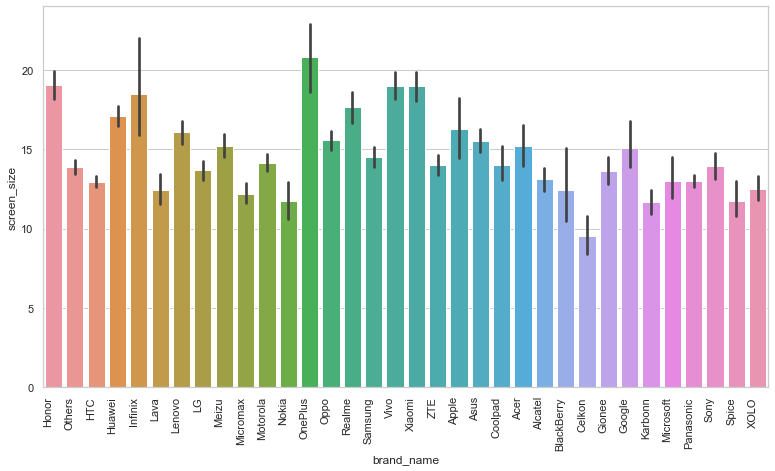

In [26]:
plt.figure(figsize=(13,7))
chart8=sns.barplot(data = df, x='brand_name',y='screen_size',)
chart8.set_xticklabels(
    chart8.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light');


* between cell phon brand `OnePluse` has the biggest screen and Celkon has smallest

### QUESTIONS

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


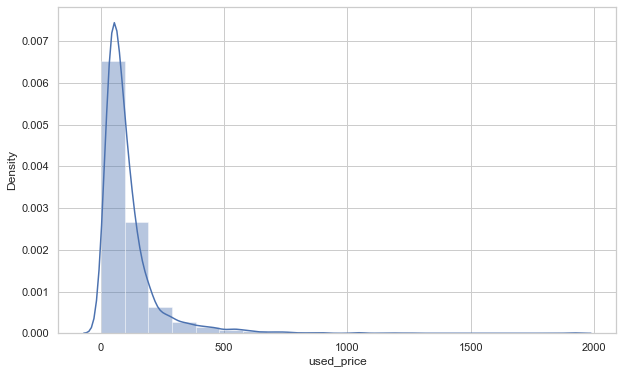

In [27]:
#What does the distribution of used phone prices look like?
plt.figure(figsize=(10,6))
sns.distplot(df.used_price,color="b",bins=20);

### we have a normal distribution highly skewed to the right for used phone prices

In [28]:
#What percentage of the used phone market is dominated by Android devices?

(df['os'].value_counts()/df['os'].value_counts().sum())[0]


0.9089890786894428

### around 90% of the used phone market is dominated by Android devices 


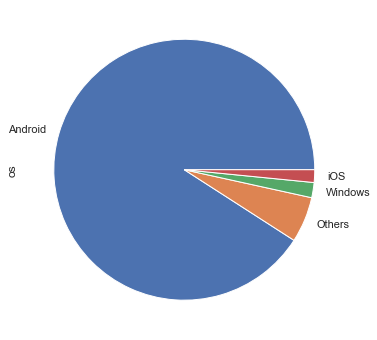

In [29]:
#showing the same results by pie plot
plt.figure(figsize=(10,6))
df['os'].value_counts().plot(kind='pie');

In [30]:
#How does the amount of RAM vary with the brand?

df.groupby('brand_name')['ram'].mean().sort_values(ascending= False)

brand_name
OnePlus      6.364
Oppo         4.961
Vivo         4.756
Huawei       4.641
Honor        4.593
Xiaomi       4.567
Google       4.533
Meizu        4.452
Realme       4.195
Samsung      4.159
Sony         4.068
Asus         4.048
ZTE          4.023
HTC          4.000
Panasonic    4.000
Apple        4.000
XOLO         4.000
Microsoft    4.000
Coolpad      3.955
Motorola     3.945
Gionee       3.933
Acer         3.902
LG           3.894
Lenovo       3.887
BlackBerry   3.830
Others       3.751
Micromax     3.750
Spice        3.750
Nokia        3.601
Alcatel      3.426
Karbonn      3.375
Lava         3.278
Infinix      2.600
Celkon       1.466
Name: ram, dtype: float64

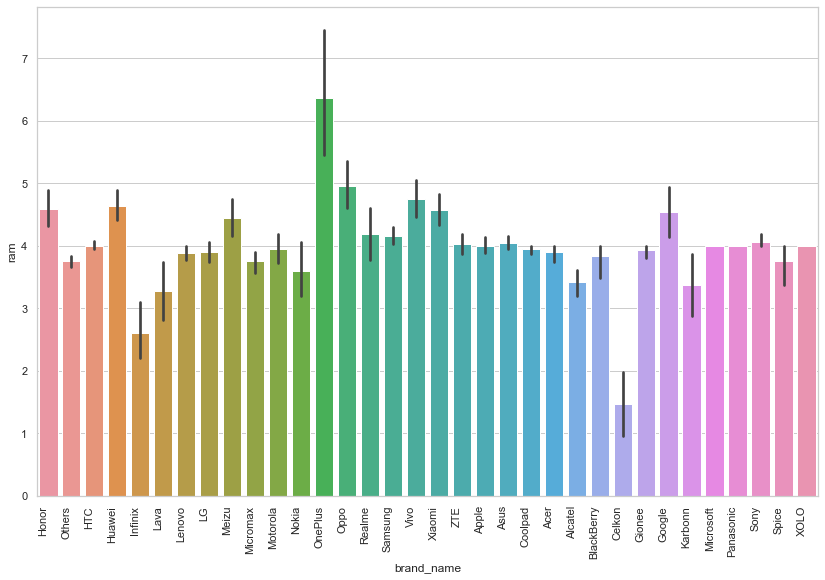

In [31]:
#the same question in plot
plt.figure(figsize=(14,9))
chart=sns.barplot(data = df, x='brand_name',y='ram',)
chart.set_xticklabels(
   chart.get_xticklabels(), 
   rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
);


by this plot we can see each brand and their ram amount. brand **One plus**(around 6.5 GB) and then **Oppo** (around 5 GB) have the biggest ram and brand **Celkon** has been located in lowest location.(around 1.5 GB)

In [32]:
#How does the weight vary for phones offering large batteries (more than 4500 mAh)?

#I started with filtering the data base on mAh>4500 and get their means
df2=df[df['battery']>4500]
df2.groupby('weight')['battery'].mean()


weight
23.000    12000.000
36.700     5493.000
48.000     5493.000
65.000     5700.000
118.000    4800.000
             ...   
740.000    9500.000
750.000    9500.000
753.000    9500.000
855.000    8380.000
950.000    9600.000
Name: battery, Length: 175, dtype: float64

<ipython-input-33-3a85f543662e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['batteryrange'] = pd.cut(df2.battery,bins, labels = labels,include_lowest = True)


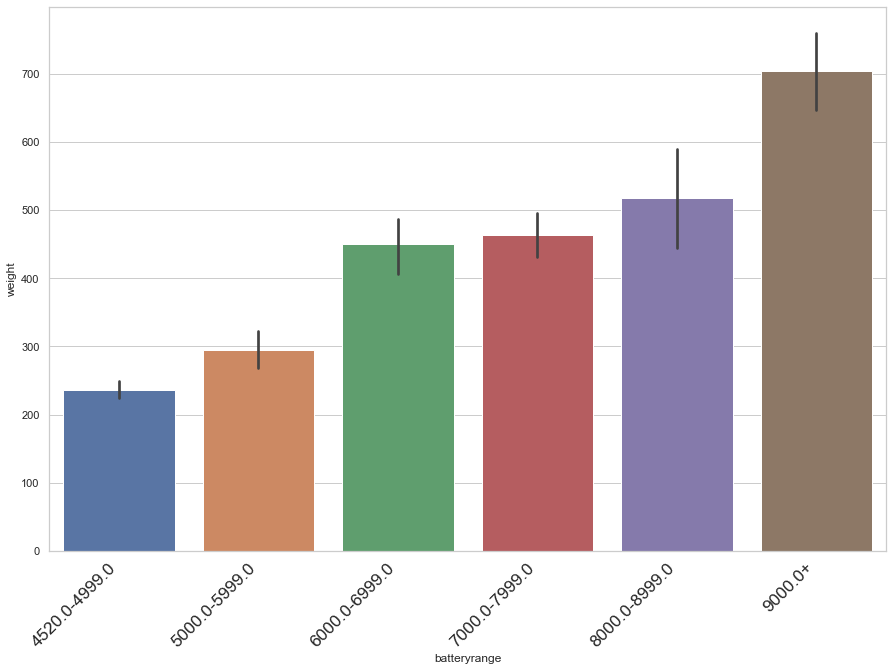

In [33]:
# for best understanding I categorized battery column to 6 groups and then got a bar plot
bins = [4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0]
labels = ['4520.0-4999.0','5000.0-5999.0','6000.0-6999.0','7000.0-7999.0','8000.0-8999.0','9000.0+']
df2['batteryrange'] = pd.cut(df2.battery,bins, labels = labels,include_lowest = True)
plt.figure(figsize=(15,10))
chart=sns.barplot(data = df2, x='batteryrange',y='weight',)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large');

#### cellphones with highest weight have larger batteries

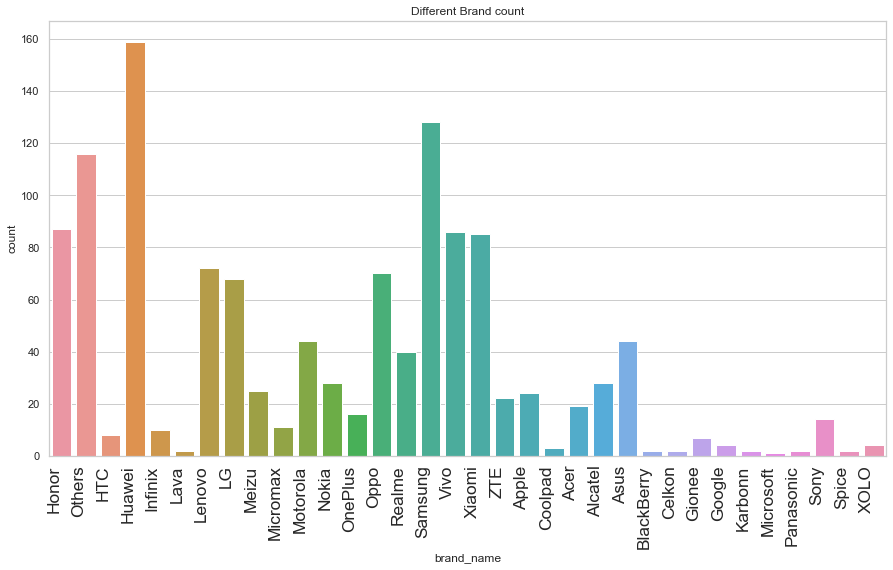

In [34]:
#How many phones are available across different brands with a screen size larger than 6 inches?

#since our valuse in screen_size column is in centimeters, I needed to convert inche to cm : 6 inches is equal to 15.24 cm

df3=df[df['screen_size']>15.24]
plt.figure(figsize=(15,8))
c=sns.countplot(data = df3, x='brand_name')
c.set_xticklabels(
    c.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title("Different Brand count")
plt.show()


In [35]:
df3['brand_name'].value_counts()

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Motorola       44
Asus           44
Realme         40
Alcatel        28
Nokia          28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
XOLO            4
Google          4
Coolpad         3
Karbonn         2
Spice           2
Lava            2
Celkon          2
Panasonic       2
BlackBerry      2
Microsoft       1
Name: brand_name, dtype: int64

##### Between all brands, Huawei and Samsung cell phones are more than other brands which have screen sizes bigger than 6 inches (159 and 

##### 128) also, we have `Other` category which is located after them(116) 

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


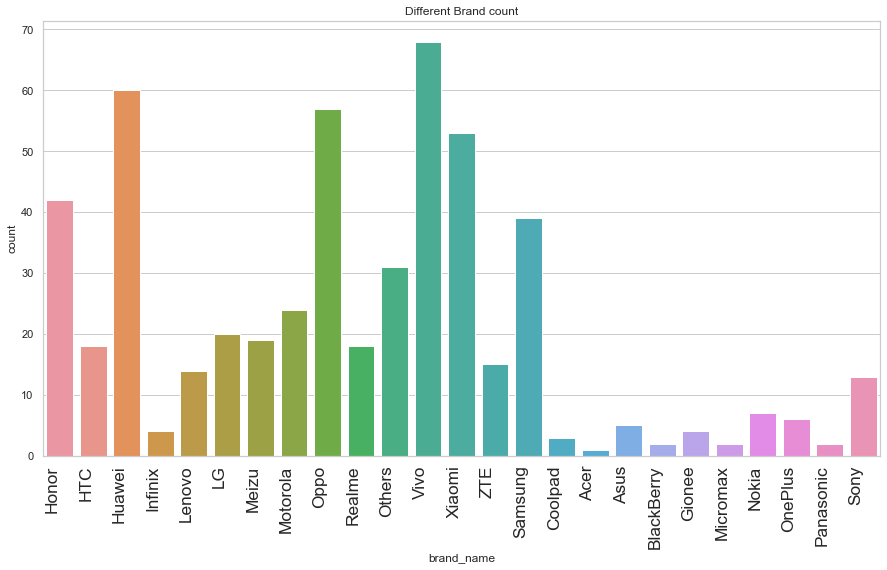

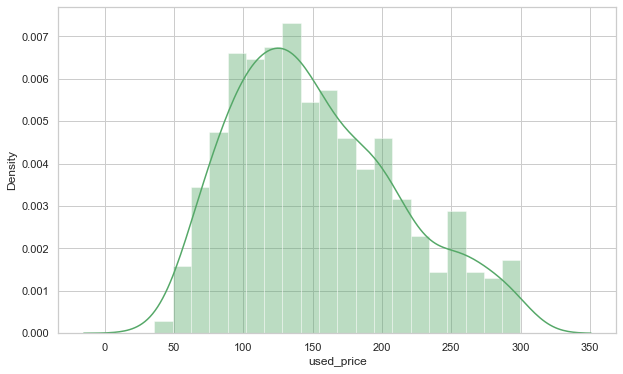

In [36]:
# What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
df4 = df[(df["selfie_camera_mp"] > 8.0) & (df["used_price"] < 300.0)]# I assumed prices less than 300 Euros as a low-cost(budget)phone

plt.figure(figsize=(15,8))
c=sns.countplot(data = df4, x='brand_name')
c.set_xticklabels(
    c.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title("Different Brand count")

plt.figure(figsize=(10,6))
sns.distplot(df4.used_price
             ,color="g",bins=20);

* the distribution of budget phones offering greater than 8MP selfie cameras across brands is look like normal but skewed to the right
* also `Vivo`, `Huawei` and `Oppo` are on the top of this list which are offering greater than 8MP selfie cameras at a low price.

In [37]:
#Which attributes are highly correlated with the used phone price?
df.corr() 

screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
screen_size             1.000           0.189             0.370       0.144   
main_camera_mp          0.189           1.000             0.424       0.004   
selfie_camera_mp        0.370           0.424             1.000       0.283   
int_memory              0.144           0.004             0.283       1.000   
ram                     0.283           0.207             0.445       0.080   
battery                 0.742           0.240             0.345       0.113   
weight                  0.635          -0.073            -0.005       0.018   
release_year            0.455           0.354             0.697       0.219   
days_used              -0.397          -0.143            -0.556      -0.229   
new_price               0.342           0.360             0.399       0.343   
used_price              0.386           0.281             0.498       0.405   

                    ram  battery  weight  release_year  days_used  new_price  \
screen_size       0.283    0.742   0.635         0.455     -0.397      0.342   
main_camera_mp    0.207    0.240  -0.073         0.354     -0.143      0.360   
selfie_camera_mp  0.445    0.345  -0.005         0.697     -0.556      0.399   
int_memory        0.080    0.113   0.018         0.219     -0.229      0.343   
ram               1.000    0.234   0.070         0.311     -0.287      0.443   
battery           0.234    1.000   0.704         0.457     -0.351      0.342   
weight            0.070    0.704   1.000         0.062     -0.059      0.198   
release_year      0.311    0.457   0.062         1.000     -0.749      0.297   
days_used        -0.287   -0.351  -0.059        -0.749      1.000     -0.236   
new_price         0.443    0.342   0.198         0.297     -0.236      1.000   
used_price        0.523    0.364   0.171         0.457     -0.471      0.926   

                  used_price  
screen_size            0.386  
main_camera_mp         0.281  
selfie_camera_mp       0.498  
int_memory             0.405  
ram                    0.523  
battery                0.364  
weight                 0.171  
release_year           0.457  
days_used             -0.471  
new_price              0.926  
used_price             1.000

#### the `new_price` column is highly correlated with the used phone price <span style="color:red"> (with corr-score of 0.92)</span>

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [38]:
# replace the missing values with median.

medianFiller = lambda x: x.fillna(x.median())
df[['main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']] = df[['main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']].apply(medianFiller,axis=0)

#### The missing values have been filled by proper value.

In [39]:
df.isnull().sum().sort_values(ascending=False)

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [40]:
#Since Columns 5g and 4g overlap each other when both values are "yes" or "no",
#I tried to apply a feature engineering to have in a new column called "4_5g",
#the actual technology of each row, containing 3 possible values: 5g, 4g, and Other.
df['4_5g'] = np.where(df['5g'] == 'yes', '5g', df['5g'])
df['4_5g'] = np.where(df['4g'] == 'yes', '4g', df['4g'])
df['4_5g'] = np.where(df['4_5g'] == 'no', 'other', df['4_5g'])


In [41]:
df.drop(['4g', '5g'], axis = 1,inplace = True)

In [42]:
df['4_5g'].value_counts()

4g       2359
other    1212
Name: 4_5g, dtype: int64

## Outlier Detection

In [43]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


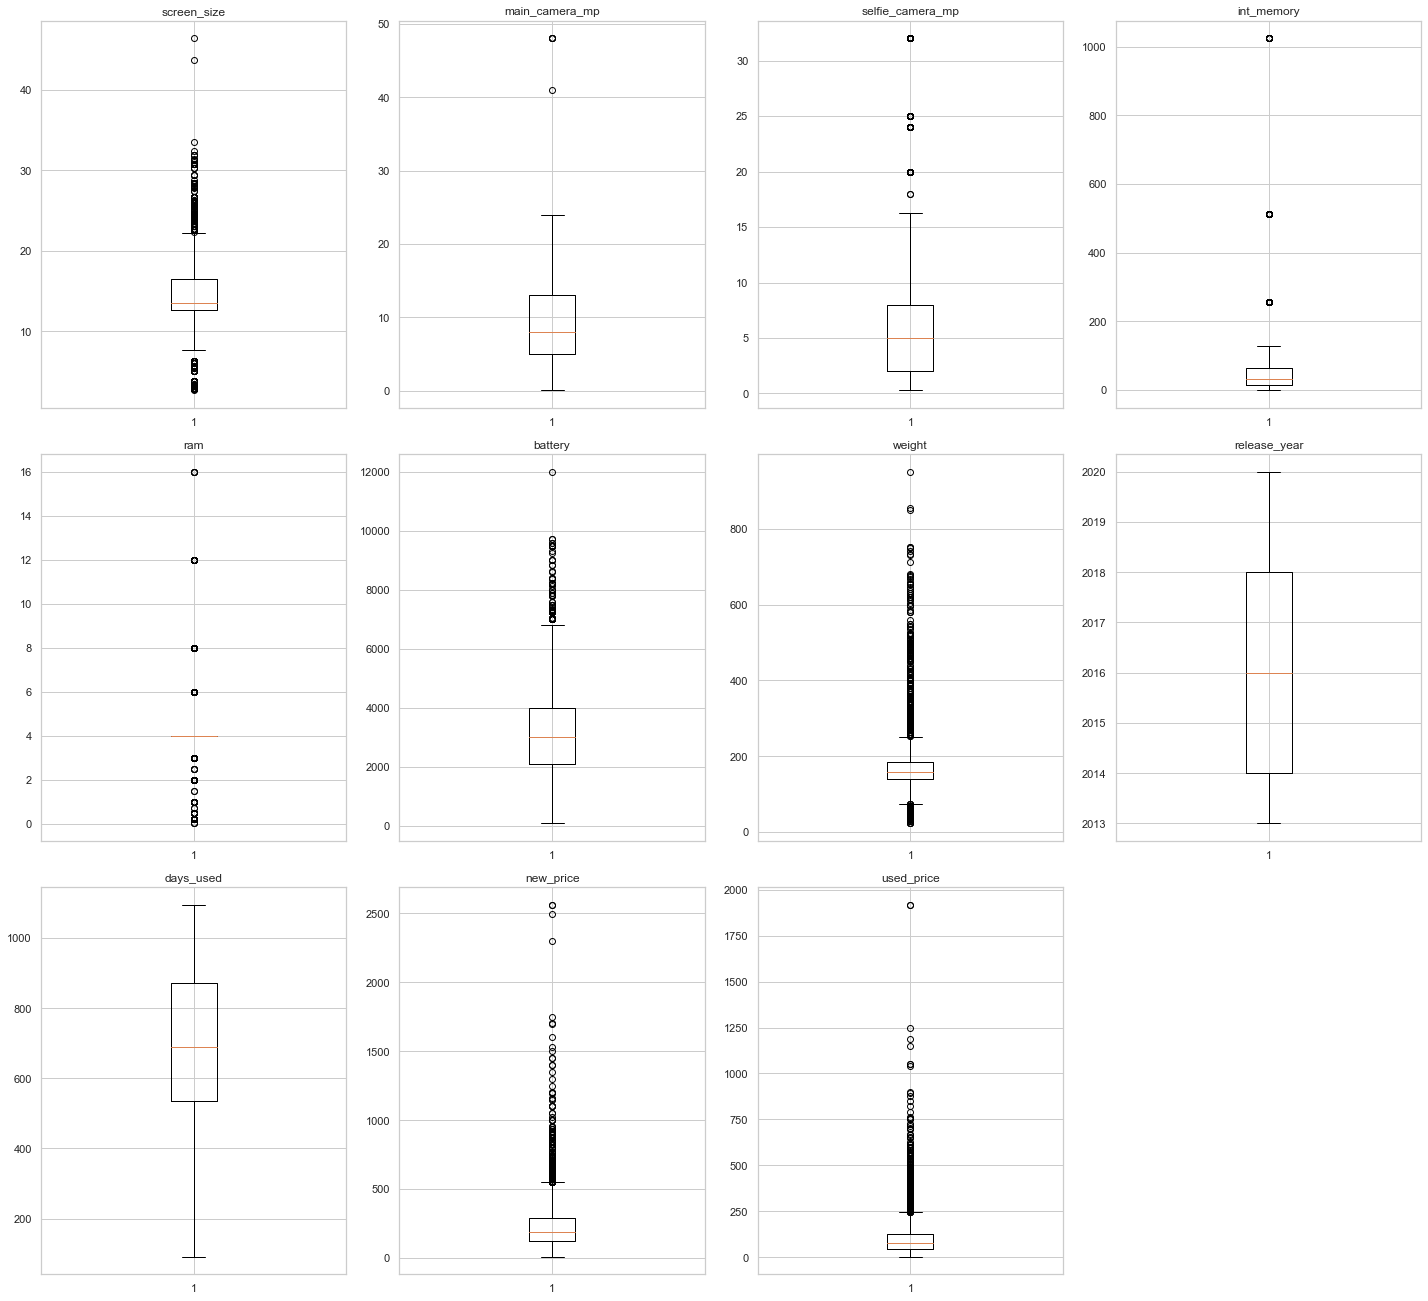

In [44]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* all of them have outliers except `days_used` and `release_year`
* weight, Screen_size and ram have lower outliers.


## Outlier Treatment

Since `new_price` and `used_price` are highly skewd, I prefer to use log transformation for them.

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


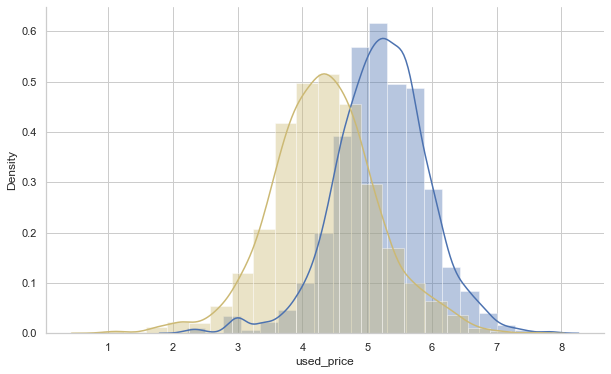

In [45]:
plt.figure(figsize=(10,6))
fig = sns.distplot(np.log(df.new_price),color="b",bins=20)
fig = sns.distplot(np.log(df.used_price),color="y",bins=20)
sns.despine();

it seems that Log transformation is helpful in reducing the skewness. the blue one is related to new_price and yellow is related to used_price. I'll transform both and create new columns for those:

In [46]:
df['log_new_price']=np.log(df.new_price)
df['log_used_price']=np.log(df.used_price)
df= df.drop(['new_price','used_price'], axis=1)
df

brand_name       os  screen_size  main_camera_mp  selfie_camera_mp  \
0         Honor  Android       23.970          13.000             5.000   
1         Honor  Android       28.100          13.000            16.000   
2         Honor  Android       24.290          13.000             8.000   
3         Honor  Android       26.040          13.000             8.000   
4         Honor  Android       15.720          13.000             8.000   
...         ...      ...          ...             ...               ...   
3566       Asus  Android       15.880           8.000             8.000   
3567       Asus  Android       15.240          13.000             8.000   
3568    Alcatel  Android       18.730          13.000             5.000   
3569    Alcatel  Android       18.730          13.000             5.000   
3570    Alcatel  Android       13.490          13.000             5.000   

      int_memory   ram  battery  weight  release_year  days_used 4_5g  \
0         64.000 3.000 3020.000 146.000          2020        127   4g   
1        128.000 8.000 4300.000 213.000          2020        325   4g   
2        128.000 8.000 4200.000 213.000          2020        162   4g   
3         64.000 6.000 7250.000 480.000          2020        345   4g   
4         64.000 3.000 5000.000 185.000          2020        293   4g   
...          ...   ...      ...     ...           ...        ...  ...   
3566      64.000 6.000 5000.000 190.000          2019        232   4g   
3567     128.000 8.000 4000.000 200.000          2018        541   4g   
3568      32.000 3.000 4000.000 165.000          2020        201   4g   
3569      32.000 2.000 4000.000 160.000          2020        149   4g   
3570      16.000 2.000 4000.000 168.000          2020        176   4g   

      log_new_price  log_used_price  
0             4.715           4.465  
1             5.519           5.084  
2             5.885           5.593  
3             5.631           5.194  
4             4.948           4.642  
...             ...             ...  
3566          6.484           6.196  
3567          6.252           5.558  
3568          4.529           4.246  
3569          4.624           4.332  
3570          4.280           3.922  

[3571 rows x 14 columns]

In [47]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        if (c!='log_new_price')& (c!='log_used_price'):
            df= treat_outliers(df, c)

    return df


In [48]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df= treat_outliers_all(df, numerical_col)

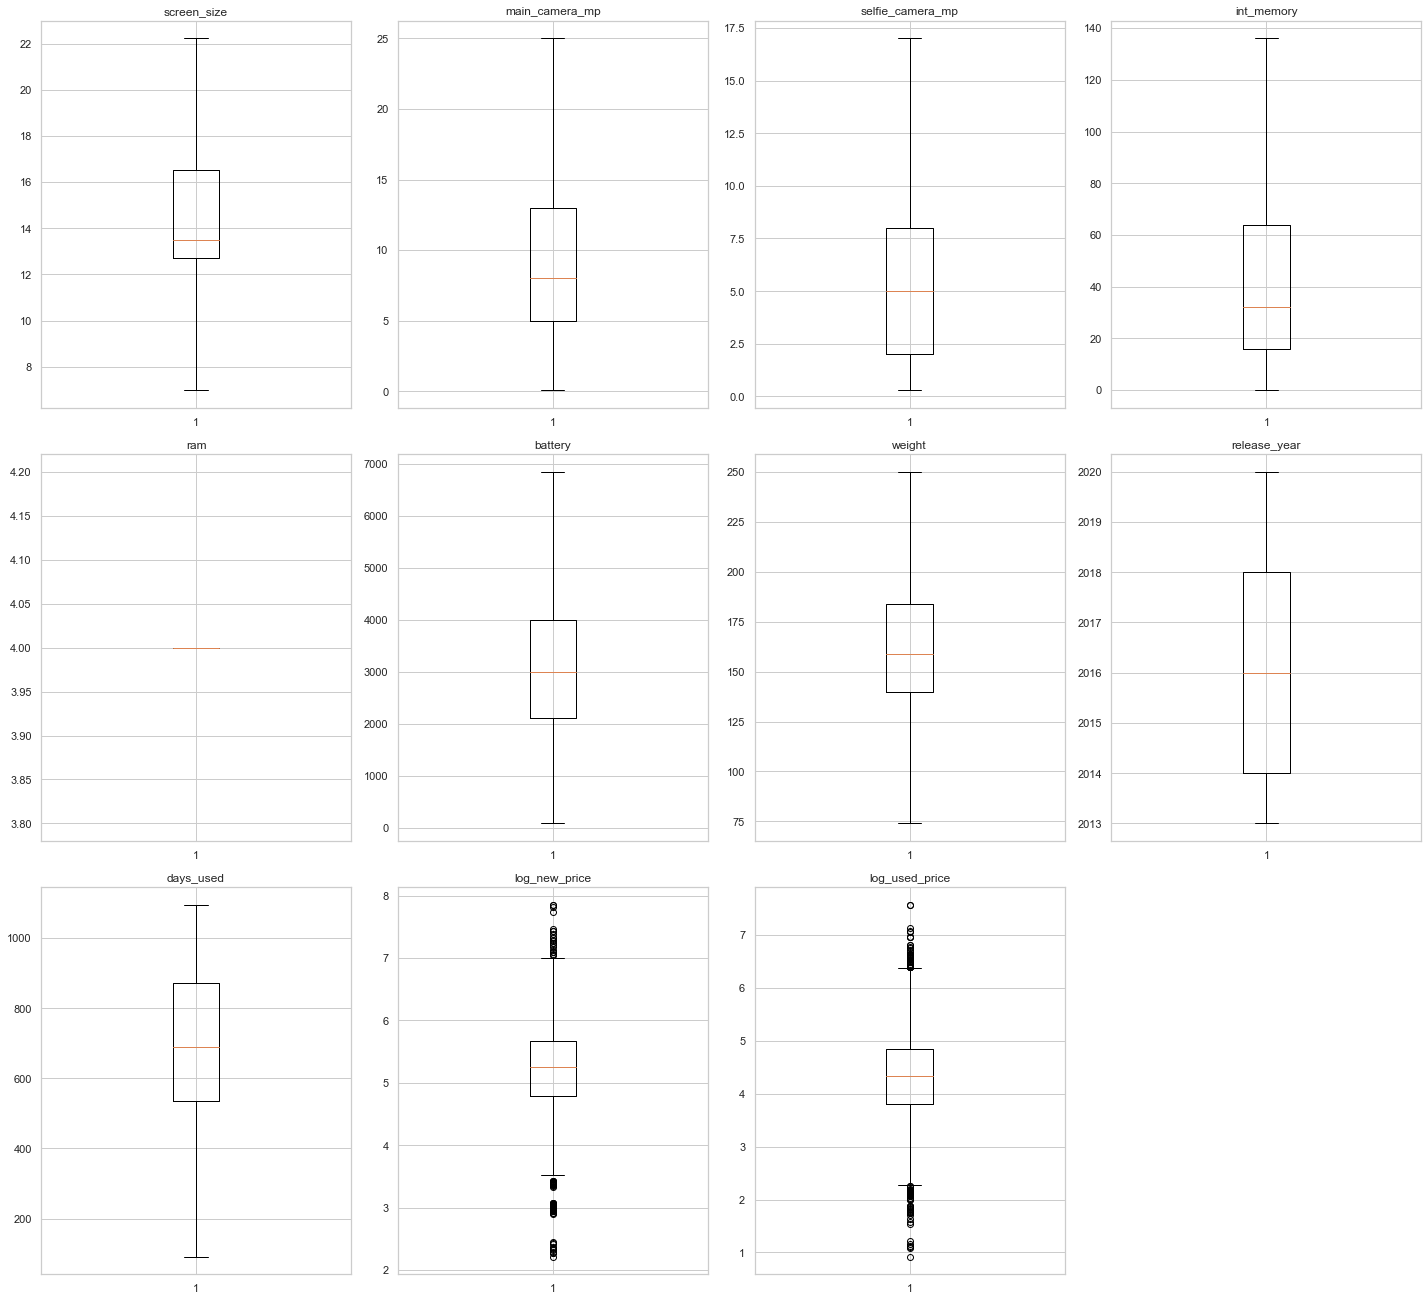

In [49]:
#all of outliers have been treated but log_new_price and log_used_price
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [50]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x)  
df.describe(include="all").T

count unique      top  freq     mean      std      min  \
brand_name           3571     34   Others   509      NaN      NaN      NaN   
os                   3571      4  Android  3246      NaN      NaN      NaN   
screen_size      3571.000    NaN      NaN   NaN   14.522    4.166    6.985   
main_camera_mp   3571.000    NaN      NaN   NaN    9.300    4.531    0.080   
selfie_camera_mp 3571.000    NaN      NaN   NaN    5.972    5.287    0.300   
int_memory       3571.000    NaN      NaN   NaN   44.583   38.939    0.005   
ram              3571.000    NaN      NaN   NaN    4.000    0.000    4.000   
battery          3571.000    NaN      NaN   NaN 3042.193 1272.573   80.000   
weight           3571.000    NaN      NaN   NaN  164.416   41.098   74.000   
release_year     3571.000    NaN      NaN   NaN 2015.965    2.292 2013.000   
days_used        3571.000    NaN      NaN   NaN  675.391  248.641   91.000   
4_5g                 3571      2       4g  2359      NaN      NaN      NaN   
log_new_price    3571.000    NaN      NaN   NaN    5.220    0.719    2.212   
log_used_price   3571.000    NaN      NaN   NaN    4.342    0.832    0.920   

                      25%      50%      75%      max  
brand_name            NaN      NaN      NaN      NaN  
os                    NaN      NaN      NaN      NaN  
screen_size        12.700   13.490   16.510   22.225  
main_camera_mp      5.000    8.000   13.000   25.000  
selfie_camera_mp    2.000    5.000    8.000   17.000  
int_memory         16.000   32.000   64.000  136.000  
ram                 4.000    4.000    4.000    4.000  
battery          2100.000 3000.000 4000.000 6850.000  
weight            140.000  159.000  184.000  250.000  
release_year     2014.000 2016.000 2018.000 2020.000  
days_used         536.000  690.000  872.000 1094.000  
4_5g                  NaN      NaN      NaN      NaN  
log_new_price       4.789    5.246    5.677    7.848  
log_used_price      3.811    4.325    4.836    7.558

In [51]:
df.shape

(3571, 14)

Since we did not delete missing values and outliers, the data shape is the same but one column has been removed

###  All plots show us that their skewness is less than before

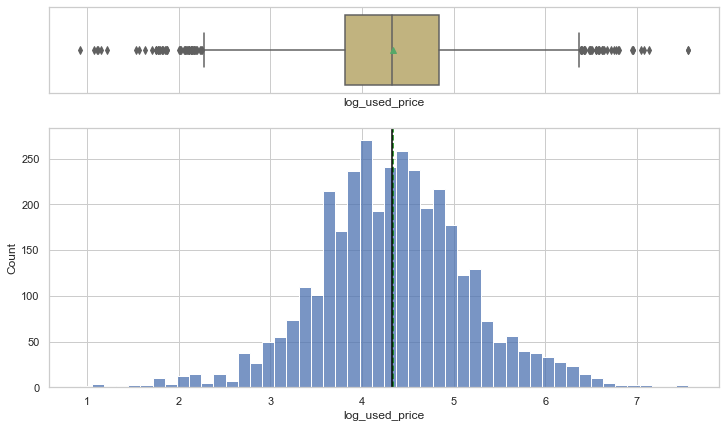

In [52]:
histogram_boxplot(df, "log_used_price")# Average used_price droped from 109.880 euro to 95.5

* its skweness is less than before

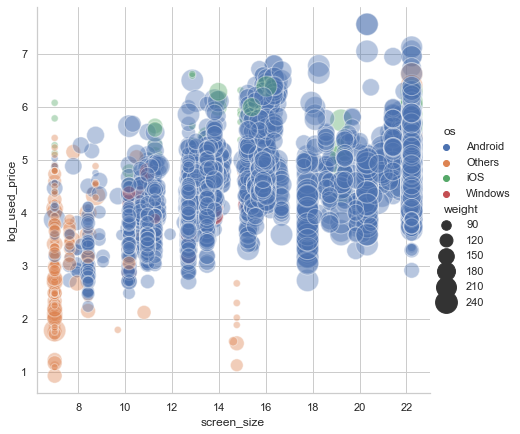

In [53]:

sns.relplot(data = df, x='screen_size', y='log_used_price', hue='os',size='weight',sizes= (50,500), 
            alpha= 0.4,height= 6 );

it seems that heavy cell phones have a bigger screen and bigger screen does affect the price.

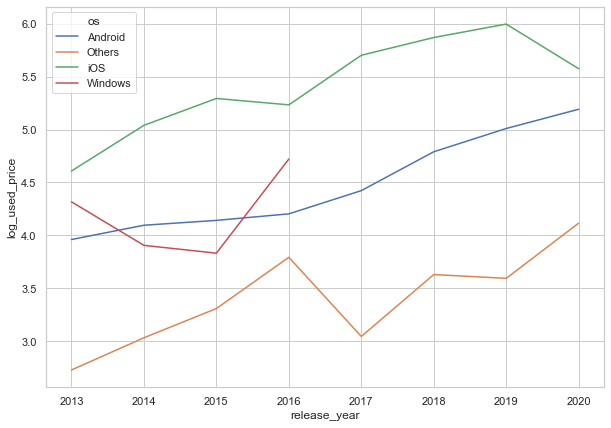

In [54]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="release_year", y="log_used_price", hue="os", ci=None);


the log_used_price of ios and Android were going up till 2019 but then ios is coming down.
Also, the Others os are going up and Windows stop producing in 2016. 
Totally it is acceptable that the recently released cell phone has a price higher than the old released..

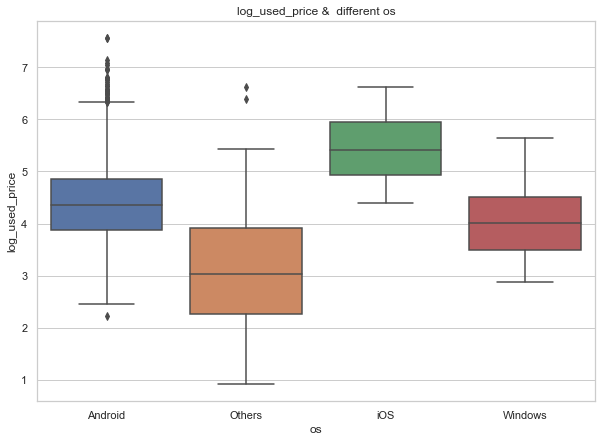

In [55]:
plt.figure(figsize=(10,7))

ax = sns.boxplot(x="os", y="log_used_price",data=df)
plt.title("log_used_price &  different os");

after dealing with missing values and outliers they seem better than before. their skewness is less with lower outliers which are not shaped the distribution. 

## QUESTIONS

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


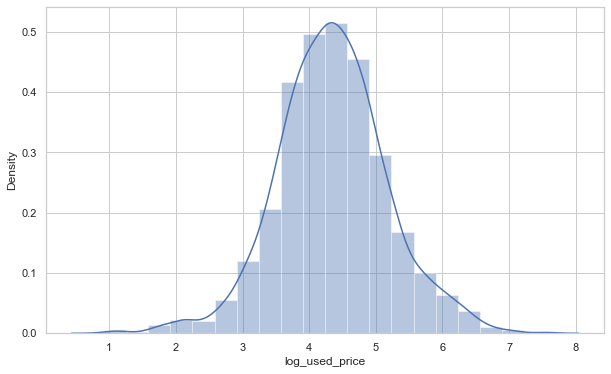

In [56]:
#What does the distribution of used phone prices look like?
plt.figure(figsize=(10,6))
sns.distplot(df.log_used_price,color="b",bins=20);

In [57]:
#What percentage of the used phone market is dominated by Android devices?

(df['os'].value_counts()/df['os'].value_counts().sum())[0]

0.9089890786894428

around 90% of the used phone market is dominated by Android devices and as you can see it doesn't change 

In [58]:
#How does the amount of RAM vary with the brand?

df.groupby('brand_name')['ram'].mean().sort_values(ascending= False)

brand_name
Acer         4.000
Panasonic    4.000
Microsoft    4.000
Motorola     4.000
Nokia        4.000
OnePlus      4.000
Oppo         4.000
Others       4.000
Realme       4.000
Alcatel      4.000
Samsung      4.000
Sony         4.000
Spice        4.000
Vivo         4.000
XOLO         4.000
Xiaomi       4.000
Micromax     4.000
Meizu        4.000
Lenovo       4.000
Lava         4.000
LG           4.000
Karbonn      4.000
Infinix      4.000
Huawei       4.000
Honor        4.000
HTC          4.000
Google       4.000
Gionee       4.000
Coolpad      4.000
Celkon       4.000
BlackBerry   4.000
Asus         4.000
Apple        4.000
ZTE          4.000
Name: ram, dtype: float64

**after dealing with outliers and missing values we just have one value in ram column so, I think it is better to delete this column**

In [59]:
#How does the weight vary for phones offering large batteries (more than 4500 mAh)?

#I started with filtering the data base on mAh>4500 and get their means
df0=df[df['battery']>4500]
df0.groupby('weight')['battery'].mean()


weight
74.000    5884.000
118.000   4800.000
130.400   6850.000
145.000   4850.000
147.500   5550.000
            ...   
238.000   6850.000
239.000   5000.000
240.000   6000.000
241.000   5000.000
250.000   6067.047
Name: battery, Length: 69, dtype: float64

<ipython-input-60-c53efa7dc628>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['batteryrange'] = pd.cut(df0.battery,bins, labels = labels,include_lowest = True)


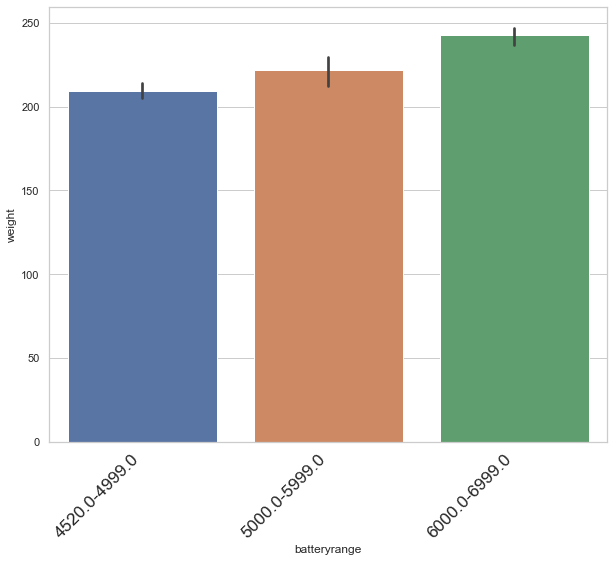

In [60]:
# for best underestanding I categorized battery column to 3 groups and then got a bar plot
bins = [4000.0, 5000.0, 6000.0, 7000.0]
labels = ['4520.0-4999.0','5000.0-5999.0','6000.0-6999.0']
df0['batteryrange'] = pd.cut(df0.battery,bins, labels = labels,include_lowest = True)
plt.figure(figsize=(10,8))
chart=sns.barplot(data = df0, x='batteryrange',y='weight',)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large');

like before cellphones with highest weight have larger batteries

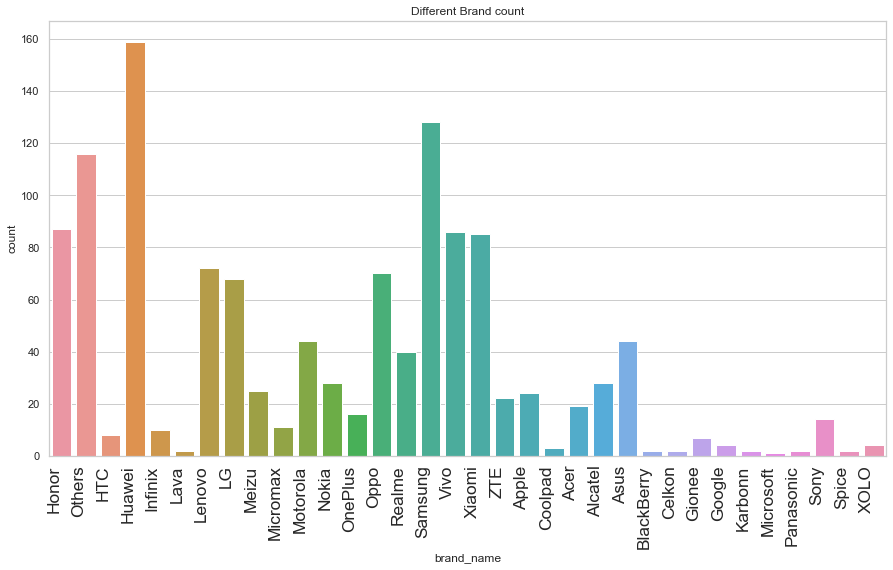

In [61]:
#How many phones are available across different brands with a screen size larger than 6 inches?

#since our valuse in screen_size column is in centimeters, I needed to convert inche to cm : 6 inches is equal to 15.24 cm

df3=df[df['screen_size']>15.24]
plt.figure(figsize=(15,8))
c=sns.countplot(data = df3, x='brand_name')
c.set_xticklabels(
    c.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title("Different Brand count")
plt.show();

In [62]:
df3['brand_name'].value_counts()

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Motorola       44
Asus           44
Realme         40
Alcatel        28
Nokia          28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
XOLO            4
Google          4
Coolpad         3
Karbonn         2
Spice           2
Lava            2
Celkon          2
Panasonic       2
BlackBerry      2
Microsoft       1
Name: brand_name, dtype: int64

##### Again between all brands, Huawei and Samsung cell phones are more than other brands which have screen sizes bigger than 6 inches (159 and  128) also, we have `Other` category which is located after them(116) 

C:\Users\narge\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


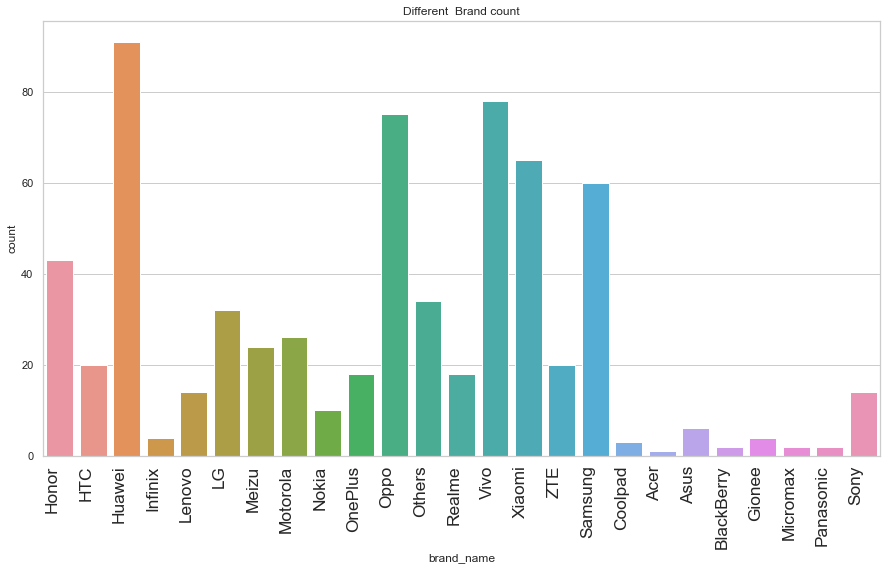

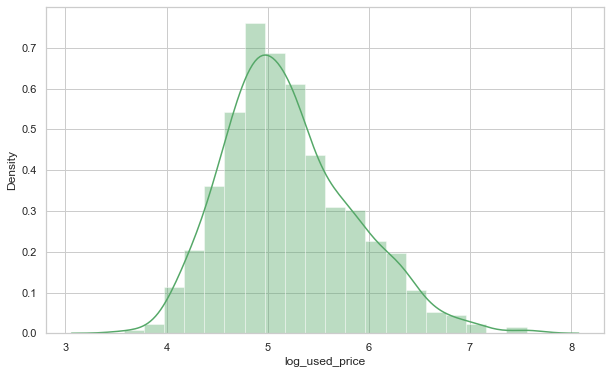

In [63]:
# What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

df4 = df[(df["selfie_camera_mp"] > 8.0) & (df["log_used_price"] < 300.0)]# I assumed prices less than 300 Euros as a low-cost(budget)phone

plt.figure(figsize=(15,8))
c=sns.countplot(data = df4, x='brand_name')
c.set_xticklabels(
    c.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title("Different  Brand count")

plt.figure(figsize=(10,6))
sns.distplot(df4.log_used_price
             ,color="g",bins=20);

the distribution of budget phones offering greater than 8MP selfie cameras across brands is normal in compere to previews plot it is not very skewed to the right

In [64]:
#Which attributes are highly correlated with the used phone price?
df.corr() 

screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
screen_size             1.000           0.190             0.441       0.357   
main_camera_mp          0.190           1.000             0.447       0.140   
selfie_camera_mp        0.441           0.447             1.000       0.612   
int_memory              0.357           0.140             0.612       1.000   
ram                       NaN             NaN               NaN         NaN   
battery                 0.754           0.240             0.409       0.314   
weight                  0.716           0.060             0.202       0.201   
release_year            0.503           0.310             0.757       0.520   
days_used              -0.436          -0.108            -0.576      -0.471   
log_new_price           0.448           0.534             0.482       0.362   
log_used_price          0.544           0.499             0.621       0.480   

                  ram  battery  weight  release_year  days_used  \
screen_size       NaN    0.754   0.716         0.503     -0.436   
main_camera_mp    NaN    0.240   0.060         0.310     -0.108   
selfie_camera_mp  NaN    0.409   0.202         0.757     -0.576   
int_memory        NaN    0.314   0.201         0.520     -0.471   
ram               NaN      NaN     NaN           NaN        NaN   
battery           NaN    1.000   0.753         0.490     -0.376   
weight            NaN    0.753   1.000         0.257     -0.216   
release_year      NaN    0.490   0.257         1.000     -0.749   
days_used         NaN   -0.376  -0.216        -0.749      1.000   
log_new_price     NaN    0.453   0.379         0.293     -0.202   
log_used_price    NaN    0.526   0.406         0.518     -0.521   

                  log_new_price  log_used_price  
screen_size               0.448           0.544  
main_camera_mp            0.534           0.499  
selfie_camera_mp          0.482           0.621  
int_memory                0.362           0.480  
ram                         NaN             NaN  
battery                   0.453           0.526  
weight                    0.379           0.406  
release_year              0.293           0.518  
days_used                -0.202          -0.521  
log_new_price             1.000           0.935  
log_used_price            0.935           1.000

#### still the `log_new_price` column is highly correlated with the used phone price <span style="color:red"> (with corr-score of 0.93)</span>

## Building a Linear Regression model

In [65]:
#Create Dummy Variables for 3 columns

df1 = pd.get_dummies(df, columns=['4_5g','os','brand_name'])

In [66]:
df1.columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'log_new_price', 'log_used_price', '4_5g_4g', '4_5g_other',
       'os_Android', 'os_Others', 'os_Windows', 'os_iOS', 'brand_name_Acer',
       'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',
       'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
       'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
       'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
       'brand_name_X

### since `ram` column has just one value(4.000) I will delete it 

In [67]:
#split the data

# independent variables
x = df1.drop(['log_used_price','4_5g_other','os_Others','brand_name_Xiaomi','ram'], axis=1)

# the dependent variable
y = df1[['log_used_price']]


In [68]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)


In [69]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


### Fit Linear Model

In [70]:
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [71]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

Coefficients
screen_size                   0.002
main_camera_mp               -0.001
selfie_camera_mp              0.001
int_memory                    0.000
battery                      -0.000
weight                       -0.000
release_year                  0.003
days_used                    -0.001
log_new_price                 0.999
4_5g_4g                      -0.006
os_Android                    0.015
os_Windows                   -0.004
os_iOS                       -0.081
brand_name_Acer              -0.011
brand_name_Alcatel            0.002
brand_name_Apple              0.099
brand_name_Asus               0.015
brand_name_BlackBerry         0.013
brand_name_Celkon             0.029
brand_name_Coolpad            0.011
brand_name_Gionee            -0.028
brand_name_Google             0.011
brand_name_HTC                0.010
brand_name_Honor              0.000
brand_name_Huawei            -0.002
brand_name_Infinix            0.044
brand_name_Karbonn           -0.004
brand_name_LG                 0.013
brand_name_Lava               0.014
brand_name_Lenovo            -0.014
brand_name_Meizu              0.006
brand_name_Micromax           0.007
brand_name_Microsoft          0.042
brand_name_Motorola           0.000
brand_name_Nokia             -0.005
brand_name_OnePlus           -0.008
brand_name_Oppo               0.005
brand_name_Others             0.013
brand_name_Panasonic         -0.025
brand_name_Realme             0.025
brand_name_Samsung            0.017
brand_name_Sony               0.014
brand_name_Spice              0.023
brand_name_Vivo              -0.014
brand_name_XOLO               0.014
brand_name_ZTE                0.012
Intercept                    -7.197

## Model performance evaluation

In [72]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    pred = np.exp(pred)#.fillna(0)
    target = np.exp(target)#.fillna(0)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE
    v_score = explained_variance_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
            "variance_score": v_score,
        },
        index=[0],
    )

    return df_perf

In [73]:
# checking model performance on train set (seen 70% data)

print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE  variance_score
0 11.230 6.989      0.992           0.992 0.069           0.992

In [74]:
# checking model performance on test set (seen 30% data)

print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE  variance_score
0 11.656 7.429      0.990           0.990 0.072           0.990

* The training **R2** is 99.0%, indicating that the model explains 99.0% of the variation in the train data. So, the model is not `underfitting`.

* **MAE** and **RMSE** on the train and test sets are comparable, which shows that the model is not `overfitting`.

* **MAE** indicates that our current model is able to predict used_price within a mean error of 7 euro on the test data.

* **MAPE** on the test set suggests we can predict within 7% of the used cell phone price.
* **variance_score** on the test set explains the dispersion of errors of a given dataset, here it is (0.99) which is close to 1.0 is highly desired, indicating better squares of standard deviations of errors.

In [75]:
linearregression.score(x_train, y_train)

0.9902005693744621

In [76]:
linearregression.score(x_test, y_test)

0.9896506208825896

* it is good to mention that since R2 for both, train and test is close to gether, itn meens that our model is not over fiting.

### Let's build a linear regression model using statsmodels.

In [77]:
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         log_used_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5386.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:35:32   Log-Likelihood:                 2686.4
No. Observations:                2499   AIC:                            -5279.
Df Residuals:                    2452   BIC:                            -5005.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.19

Some p_values are hight. it seem that we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

###### We will be checking the following Linear Regression assumptions:

   * No Multicollinearity

   * Linearity of variables
   
   * Independence of error terms

   * Normality of error terms

   * No Heteroscedasticity

### 1: MULTICOLLINEARITY

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [80]:
checking_vif(x_train1)

feature         VIF
0                   const 3973109.515
1             screen_size       3.695
2          main_camera_mp       2.197
3        selfie_camera_mp       3.880
4              int_memory       2.145
5                 battery       3.608
6                  weight       3.145
7            release_year       5.148
8               days_used       2.624
9           log_new_price       2.968
10                4_5g_4g       2.413
11             os_Android       2.589
12             os_Windows       1.977
13                 os_iOS      20.946
14        brand_name_Acer       1.394
15     brand_name_Alcatel       1.814
16       brand_name_Apple      22.142
17        brand_name_Asus       1.898
18  brand_name_BlackBerry       1.222
19      brand_name_Celkon       1.436
20     brand_name_Coolpad       1.129
21      brand_name_Gionee       1.425
22      brand_name_Google       1.102
23         brand_name_HTC       1.831
24       brand_name_Honor       1.721
25      brand_name_Huawei       2.637
26     brand_name_Infinix       1.097
27     brand_name_Karbonn       1.290
28          brand_name_LG       2.493
29        brand_name_Lava       1.283
30      brand_name_Lenovo       2.151
31       brand_name_Meizu       1.401
32    brand_name_Micromax       1.906
33   brand_name_Microsoft       1.653
34    brand_name_Motorola       1.708
35       brand_name_Nokia       2.061
36     brand_name_OnePlus       1.227
37        brand_name_Oppo       1.956
38      brand_name_Others       4.203
39   brand_name_Panasonic       1.340
40      brand_name_Realme       1.299
41     brand_name_Samsung       3.518
42        brand_name_Sony       1.666
43       brand_name_Spice       1.335
44        brand_name_Vivo       1.766
45        brand_name_XOLO       1.432
46         brand_name_ZTE       1.891

* The variables which have VIF much greater than 5, are correlated with each other. here we have `brand_name_Apple`, `release_year` & `os_iOS` greater than 5.

### Removing Multicollinearity

In [81]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
    
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [82]:

col_list = [
    "brand_name_Apple",
    "os_iOS","release_year",
   
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0            os_iOS                              0.990   
1  brand_name_Apple                              0.990   
2      release_year                              0.990   

   RMSE after dropping col  
0                    0.083  
1                    0.083  
2                    0.083

* I'll drop os_iOS and check the VIF again.

In [83]:
col_to_drop = "os_iOS"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


feature         VIF
0                   const 3972229.195
1             screen_size       3.695
2          main_camera_mp       2.194
3        selfie_camera_mp       3.870
4              int_memory       2.136
5                 battery       3.603
6                  weight       3.144
7            release_year       5.147
8               days_used       2.623
9           log_new_price       2.967
10                4_5g_4g       2.412
11             os_Android       2.589
12             os_Windows       1.977
13        brand_name_Acer       1.393
14     brand_name_Alcatel       1.814
15       brand_name_Apple       2.238
16        brand_name_Asus       1.898
17  brand_name_BlackBerry       1.222
18      brand_name_Celkon       1.436
19     brand_name_Coolpad       1.129
20      brand_name_Gionee       1.424
21      brand_name_Google       1.102
22         brand_name_HTC       1.830
23       brand_name_Honor       1.721
24      brand_name_Huawei       2.637
25     brand_name_Infinix       1.097
26     brand_name_Karbonn       1.290
27          brand_name_LG       2.493
28        brand_name_Lava       1.283
29      brand_name_Lenovo       2.151
30       brand_name_Meizu       1.401
31    brand_name_Micromax       1.906
32   brand_name_Microsoft       1.653
33    brand_name_Motorola       1.708
34       brand_name_Nokia       2.060
35     brand_name_OnePlus       1.227
36        brand_name_Oppo       1.956
37      brand_name_Others       4.202
38   brand_name_Panasonic       1.340
39      brand_name_Realme       1.299
40     brand_name_Samsung       3.517
41        brand_name_Sony       1.666
42       brand_name_Spice       1.335
43        brand_name_Vivo       1.766
44        brand_name_XOLO       1.432
45         brand_name_ZTE       1.890

release_year is still high:	5.147 so I will delete it

In [84]:
col_to_drop = "release_year"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


feature     VIF
0                   const 129.171
1             screen_size   3.640
2          main_camera_mp   2.183
3        selfie_camera_mp   3.150
4              int_memory   2.095
5                 battery   3.562
6                  weight   3.136
7               days_used   1.935
8           log_new_price   2.715
9                 4_5g_4g   2.157
10             os_Android   2.589
11             os_Windows   1.970
12        brand_name_Acer   1.393
13     brand_name_Alcatel   1.811
14       brand_name_Apple   2.201
15        brand_name_Asus   1.897
16  brand_name_BlackBerry   1.221
17      brand_name_Celkon   1.418
18     brand_name_Coolpad   1.129
19      brand_name_Gionee   1.424
20      brand_name_Google   1.097
21         brand_name_HTC   1.830
22       brand_name_Honor   1.721
23      brand_name_Huawei   2.634
24     brand_name_Infinix   1.096
25     brand_name_Karbonn   1.285
26          brand_name_LG   2.486
27        brand_name_Lava   1.283
28      brand_name_Lenovo   2.151
29       brand_name_Meizu   1.400
30    brand_name_Micromax   1.906
31   brand_name_Microsoft   1.644
32    brand_name_Motorola   1.703
33       brand_name_Nokia   2.048
34     brand_name_OnePlus   1.226
35        brand_name_Oppo   1.955
36      brand_name_Others   4.198
37   brand_name_Panasonic   1.338
38      brand_name_Realme   1.292
39     brand_name_Samsung   3.513
40        brand_name_Sony   1.666
41       brand_name_Spice   1.332
42        brand_name_Vivo   1.765
43        brand_name_XOLO   1.430
44         brand_name_ZTE   1.890

#### The above predictors have no multicollinearity and the assumption is satisfied.

* model performance.

In [85]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         log_used_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5621.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:35:33   Log-Likelihood:                 2683.1
No. Observations:                2499   AIC:                            -5276.
Df Residuals:                    2454   BIC:                            -5014.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

* The adj. R-squared has not changed(0.99) which shows that the dropped variables did not have much effect on the model. some columns have a p-value greater than 0.05, they are not significant and I'll drop them

In [86]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'int_memory', 'days_used', 'log_new_price', 'brand_name_Gionee', 'brand_name_Lenovo', 'brand_name_Panasonic']


In [87]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [88]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         log_used_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.535e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:35:33   Log-Likelihood:                 2665.4
No. Observations:                2499   AIC:                            -5315.
Df Residuals:                    2491   BIC:                            -5268.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1337 

### There is no feature with p-value greater than 0.05, so we'll consider the features in x_train4 as the final ones and olsmod2 as final mode

* also Adj. R-squared is 0.99 which means it can explain our model ~99% of the variance. This shows that the model is good.

checking the rest of the assumptions on olsmod2.
* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

**TEST FOR LINEARITY AND INDEPENDENCE**

In [89]:
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train.values.reshape(y_train.shape[0])  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred

Actual Values  Fitted Values  Residuals
0             4.594          4.475     -0.009
1             4.887          5.062      0.023
2             3.230          5.611     -0.018
3             4.647            NaN        NaN
4             3.669            NaN        NaN
...             ...            ...        ...
2494          5.303            NaN        NaN
2495          3.184          4.856     -0.095
2496          3.582            NaN        NaN
2497          4.371          4.758     -0.044
2498          2.856          5.581      0.038

[2499 rows x 3 columns]

In [90]:
#since we have NaN in our data I replaced them by their median
medianFiller = lambda x: x.fillna(x.median())
df_pred=df_pred[['Fitted Values','Residuals','Actual Values']].apply(medianFiller,axis=0)


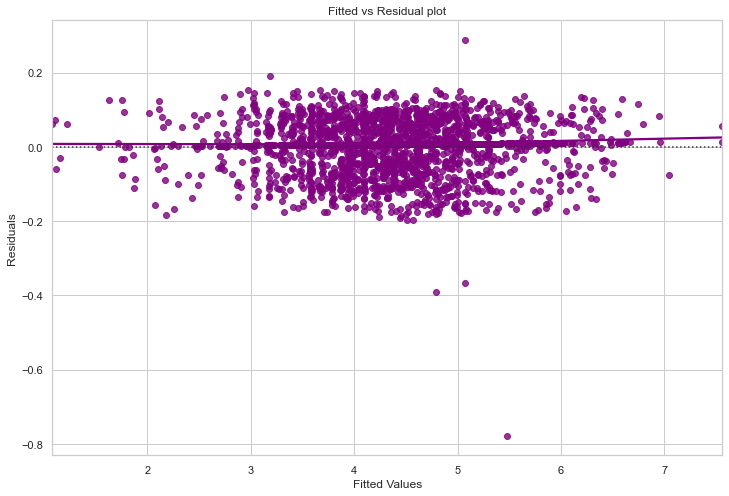

In [92]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Actual Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


We see no pattern in the plot above. Hence, the assumptions of linearity and independence **are satisfied**

### check the normality

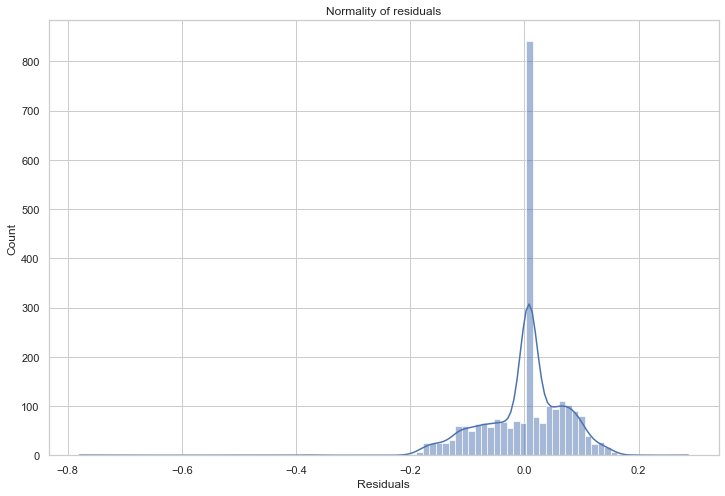

In [93]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does not have a bell shape.

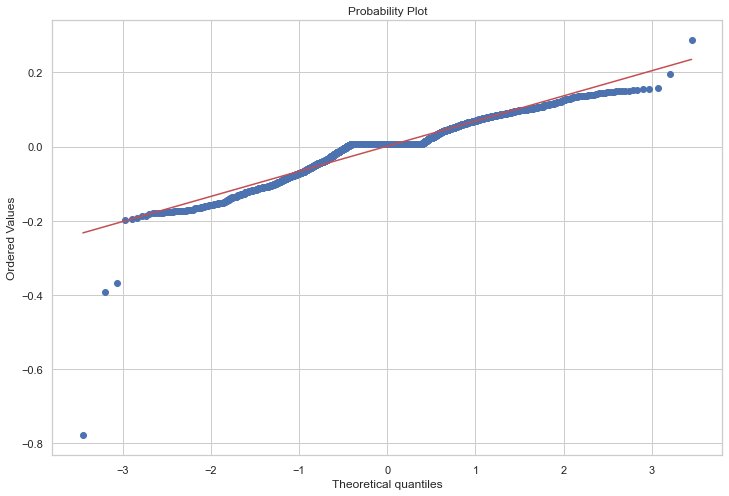

In [94]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show();

* The residuals more or less follow a straight line but in my opinion, it is not completely straight

In [95]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9292929768562317, pvalue=7.892092747268215e-33)

**Null hypothesis: Residuals are normally distributed**

**Alternate hypothesis: Residuals are not normally distributed**

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. 

### Homoscedasticity test

In [96]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"] , x_train4)
lzip(name, test)

[('F statistic', 0.9683741300725583), ('p-value', 0.7143144159387494)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, **this assumption is satisfied.**


### All the assumptions of linear regression have been checked but two tests for checking the normality are not satisfied. since I did set the model on `log transformation` for `y`  I believe we should apply non-parametric tests e.g. chi-square in place of correlation. Although I believe there should be some complicated  transformations to solve this problem  which I don't know them yet...

## Final Model Summary

In [97]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         log_used_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.535e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:35:35   Log-Likelihood:                 2665.4
No. Observations:                2499   AIC:                            -5315.
Df Residuals:                    2491   BIC:                            -5268.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1337 

* There is negative relationship between used_ price and days_used, some brand name like Gionee, Panasonic and Lenovo.It means for example, for every unit increase in days_used (one day) there is a 0.0011€ decrease in used_price.
* 1 unit increase in int_memory(GB) leads to an increase in used_price by 0.001€.
* 1 unit increase in screen_size (cm) leads to an increase in used_price by 0.001788€.
* 1 EURO increase in log_new_price(price of new cell phone) leads to increase in used_price(used cell phones) by 0.99€.

##### I think price of used cell phones is much related to the price of new cell phones .


In [98]:

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE  variance_score
0 11.473 7.136      0.991           0.991 0.070           0.991

In [99]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



RMSE   MAE  R-squared  Adj. R-squared  MAPE  variance_score
0 11.487 7.322      0.990           0.990 0.071           0.990

The model is able to explain ~99% of the variation in the data, which is very good.

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

The MAPE on the test set suggests we can predict within 7% of the used cell phone price.

Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

- 